In [6]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

In [7]:
# loading the dataset using pandas
dataset = pd.read_csv("BankNoteAuthentication.csv")
dataset

variance  skewness  curtosis  entropy  class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]

In [8]:
# sort the dataset based on the variance of the wavelet transformed image
dataset.sort_values("variance", inplace=True)
dataset

variance  skewness  curtosis  entropy  class
1233   -7.0421    9.2000  0.259330 -4.68320      1
1294   -7.0364    9.2931  0.165940 -4.53960      1
1172   -6.9599    8.9931  0.218200 -4.57200      1
989    -6.7526    8.8172 -0.061983 -3.72500      1
1203   -6.7387    6.9879  0.678330 -7.58870      1
...        ...       ...       ...      ...    ...
199     5.8862    5.8747 -2.816700 -0.30087      0
513     5.9374    6.1664 -2.590500 -0.36553      0
215     6.0919    2.9673 -1.326700  1.45510      0
28      6.5633    9.8187 -4.411300 -3.22580      0
634     6.8248    5.2187 -2.542500  0.54610      0

[1372 rows x 5 columns]

In [4]:
# calculating standard deviation
std_dev = np.std(dataset)
std_dev

V1    2.841726
V2    5.866907
dtype: float64

In [5]:
# extra code to save the figures as high-res PNGs for the book

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

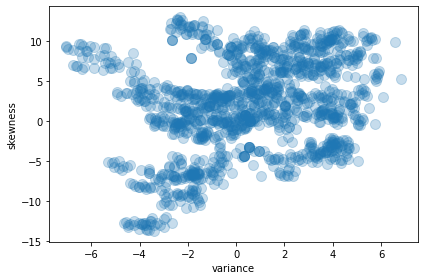

In [6]:
# Visualizing the data
plt.xlabel("variance")
plt.ylabel("skewness")

plt.scatter(dataset["V1"], dataset["V2"], s=100, alpha=0.25)
save_fig('Visualizing_banknote_data')
plt.show()

In [7]:
var = dataset['V1']
skew = dataset['V2']

var_skew = np.column_stack((var, skew))
var_skew

array([[  3.6216 ,   8.6661 ],
       [  4.5459 ,   8.1674 ],
       [  3.866  ,  -2.6383 ],
       ...,
       [ -3.7503 , -13.4586 ],
       [ -3.5637 ,  -8.3827 ],
       [ -2.5419 ,  -0.65804]])

C:\Users\ojare\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


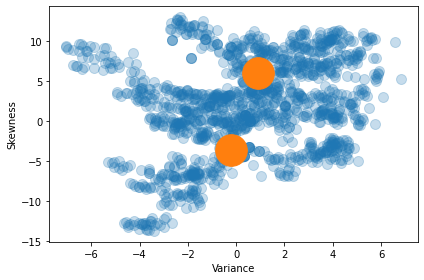

In [8]:
# running KMeans clustering on the dataset
from sklearn.cluster import KMeans

km_res = KMeans(n_clusters=2).fit(var_skew)
clusters = km_res.cluster_centers_

plt.xlabel("Variance")
plt.ylabel("Skewness")
plt.scatter(var, skew, s=100, alpha=0.25)
plt.scatter(clusters[:,0], clusters[:,1], s=1000)
save_fig("KMeans_clustering_results")
plt.show()

## Visualizing Results
KMeans Algorithm works well with this dataset. From the plot above the algorithm has created two realistic clusters based on the values of Variance and Skewness of the Wavelet Transformed images. It is clear that the first cluster is based on values that are less than zero and the other clusters is based on values that are greater than zero. This might imply that those with values less than zero for both variance and skewness are fake notes but there is 12% chance of genuine notes, the same applies to those with values greater than zero.

In [9]:
km_res.cluster_centers_

array([[ 0.88705643,  5.94561166],
       [-0.19838275, -3.68774038]])